# Lab Assignment Two: Exploring Image Data
**Wen Yang (47781972), Ziling Feng (47781816), Zheqi Wang (47711564), Beichen Hu (47809766)**

## 1. Business Understanding
### 1.1 Data Resource and Overview
The data set is from a beekeeper's video, which is calculated by averaging the frames, and each frame of the video is subtracted from the background to bring the bees to the front. The bees are then clipped from the frame so that there is only one bee per image.<br />
This dataset contains a total of more than 5,100 bee images, and each bee image contains information including location, date, time, subspecies, hive health, caste and pollen. All of these are saved in a csv file.<br />
What we do is to predict the health status of the hive based on the picture of the bee. The health status of the hive are divided into the following categories:<br />
- healthy<br />
- hive being robbed<br />
- few varrao, hive beetles<br />
- ant problems<br />
- missing queen<br />
- Varroa, Small Hive Beetles<br />

### 1.2 Business Value
Bees are a type of pollinator and play a vital role in pollination. They pollinate 76 percent of the world's food crops and 84 percent of the world's plants. According to a scientific research in 2008, the value of all pollinators to food crops (excluding livestock feed) is about 153 billion euros a year. We could find that bees have high commercial value. On the other hand, the honey they produce is also a good nutrient. Honey also could kill bacteria. Bee venom has a great use value, which can stimulate the human body, in order to achieve medical effect. Both beeswax and propolis are also useful in daily life.<br />
Bees play an important role in people's lives. But we that over 60% of honeybee hives were lost in some states in the winter due to health problems. Many signs of strength and health can be seen inside the hive, but frequent checks of the hive are time-consuming and generally destructive to the bees' workflow and the hive. <br />
However, we can learn more about the hive by surveying the bees leaving the hive. For example, the bees in unhealthy hives infected with varroa mites might have deformed wings or mites on their backs. These features can be observed without opening the hive. To prevent robber bees, we can track the ratio of bees that carry pollen to those that don't. Large Numbers of bees without pollen may be a sign of robber bees.<br />
So we need to observe the bees to learn the health of the hive. The health of the hive is very important for the bees. We can avoid the decline of the number of bees through keeping the health of the hive, so as to guarantee the production of food crops, fruits, nuts and flowers.<br />
We believe that beekeepers will be very interested in this prediction model. Beekeepers can find unhealthy hives as soon as possible according to the model, and solve the problem in time avoid the decline of the number of bees, and also avoid the beekeeper's economic loss.<br />

### 1.3 Prediction Task
We need to predict the health state of the hive. In other word, we want to know whether the hive is healthy. And if it is unhealthy, we want to know the reason--what kind of disease the hive is suffering from.<br />

We believe that our model prediction accuracy need over 60%-80%. It is a trade off to determine whether to check the hives, which is time-consuming to check the hive casually, and it is generally destructive to the bee's workflow and hive. Only when the accuracy is higher than human decision, this model can bring convenience and economic benefits.

## 2. Data Preparation

We import the images, resize the images and convert to numpy array. And we add the corresponding health states as labels, saved in a array.

In [27]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import imageio
import glob
import pandas as pd

In [28]:
X_data=[]
im_arr=[]
im_target=[]

df = pd.read_csv('bee_data.csv') # target in a csv file, attribute 'health'
for im_path in glob.glob("bee_imgs/*.png"):
    # read the images
    im = Image.open(im_path)
    #test the image size: print(im.size)-->(71,78)
    #resize all images with (78,78)
    im = im.resize((78, 78),Image.ANTIALIAS)
    X_data.append(im)
    
    # transfet image to numpy array
    im_arr.append(np.array(im)/255)
    target =df[df.file == im_path.split('/')[-1]].health.tolist()
    im_target.append(target)

print(im_arr[0])
print(im_target[0])
print(X_data[0])

[[[0.95294118 0.74901961 0.50588235]
  [0.94117647 0.7372549  0.50196078]
  [0.9254902  0.7254902  0.48627451]
  ...
  [0.90196078 0.6745098  0.45882353]
  [0.92156863 0.69411765 0.47843137]
  [0.9254902  0.69803922 0.48235294]]

 [[0.85098039 0.64705882 0.40392157]
  [0.85098039 0.64705882 0.41176471]
  [0.85490196 0.65490196 0.41568627]
  ...
  [0.97254902 0.74509804 0.52941176]
  [0.99215686 0.76470588 0.54901961]
  [1.         0.77254902 0.55686275]]

 [[0.88627451 0.67058824 0.45098039]
  [0.88627451 0.67058824 0.45098039]
  [0.89803922 0.68235294 0.4627451 ]
  ...
  [0.98823529 0.77254902 0.56078431]
  [1.         0.78823529 0.57647059]
  [1.         0.79607843 0.58431373]]

 ...

 [[0.90196078 0.71764706 0.52156863]
  [0.90588235 0.72941176 0.52941176]
  [0.85882353 0.68627451 0.48627451]
  ...
  [0.88627451 0.7254902  0.54901961]
  [0.88627451 0.7254902  0.54901961]
  [0.89411765 0.73333333 0.55686275]]

 [[0.83137255 0.64313725 0.4745098 ]
  [0.84313725 0.6627451  0.49019608]


Now, the image is stored in RGB matrices. And we convert RGB image to gray image.

In [29]:
def rgb2gray(rgb): # function convert RGB to gray

    r, g, b = rgb[:,:,0], rgb[:,:,1], rgb[:,:,2]
    gray = 0.2989 * r + 0.5870 * g + 0.1140 * b

    return gray

In [30]:
im_grayarr=[] # gray image list
for im in im_arr:
    gray = rgb2gray(np.array(im))    
    im_grayarr.append(np.array(gray))
    
print(im_grayarr[0])

[[0.78217922 0.7713098  0.75792706 ... 0.71783922 0.7374451  0.74136627]
 [0.68022863 0.68112275 0.68734588 ... 0.78842039 0.80802627 0.81586863]
 [0.70995451 0.70995451 0.72171804 ... 0.81279922 0.82731176 0.8328098 ]
 ...
 [0.75031373 0.75928588 0.71498078 ... 0.75335843 0.75335843 0.76120078]
 [0.68011294 0.69692745 0.69575529 ... 0.74259804 0.75088745 0.7587298 ]
 [0.73108824 0.71698039 0.70751882 ... 0.74607216 0.7587298  0.76657216]]


Then we linearize the images to create a table of 1-D image features, which each row is one image.

In [31]:
row_arr=[]
for img in im_grayarr:
    one_img=[]
    for item in img:
        one_img.extend(item)
    # print(one_img)
    row_arr.append(one_img)
#print(row_arr[0])

In [32]:
X=np.array(row_arr)
y=np.array(im_target)

In [33]:
n_samples, n_features = np.shape(X)
print("n_samples: {}".format(n_samples))
print("n_features: {}".format(n_features))

n_samples: 5172
n_features: 6084


We totally have 5172 images and each image has 6084 pixels.  
The following is some images we virtualized.

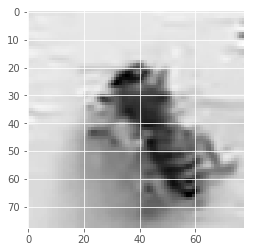

In [34]:
plt.imshow(im_grayarr[10],cmap='Greys_r')

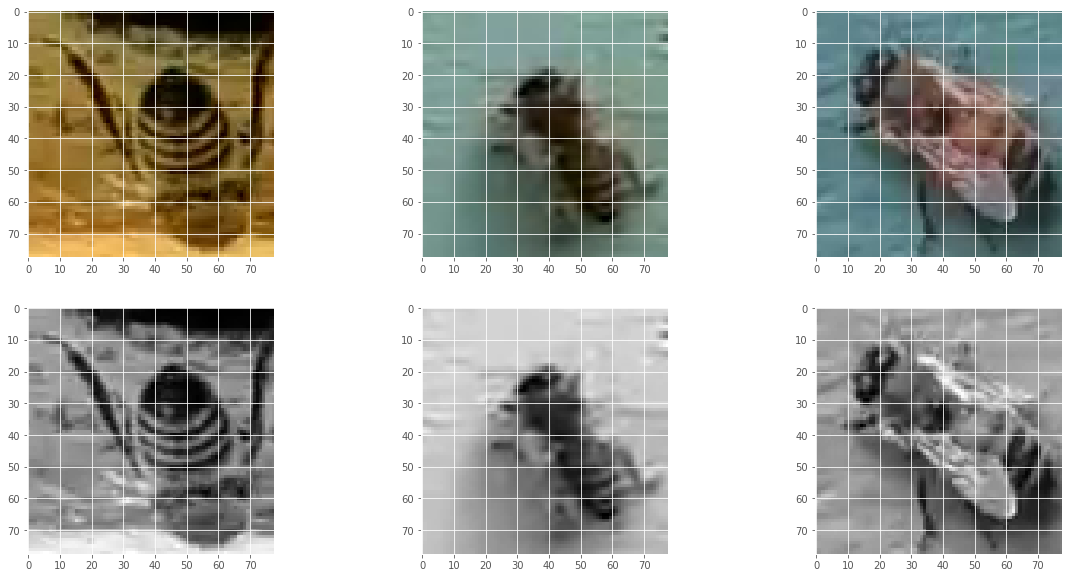

In [35]:
import matplotlib.pyplot as plt # plt to show image
plt.style.use('ggplot')

fig = plt.figure(figsize=(20,10))

plt.subplot(2,3,4)# image1
plt.imshow(im_grayarr[1],cmap = plt.get_cmap('gray')) 
plt.subplot(2,3,1)
plt.imshow(im_arr[1])

plt.subplot(2,3,5)# image10
plt.imshow(im_grayarr[10],cmap = plt.get_cmap('gray')) 
plt.subplot(2,3,2)
plt.imshow(im_arr[10])

plt.subplot(2,3,6)# image60
plt.imshow(im_grayarr[60],cmap = plt.get_cmap('gray')) 
plt.subplot(2,3,3)
plt.imshow(im_arr[60])

## 3. Data Reduction

First, let's view some images and their label.

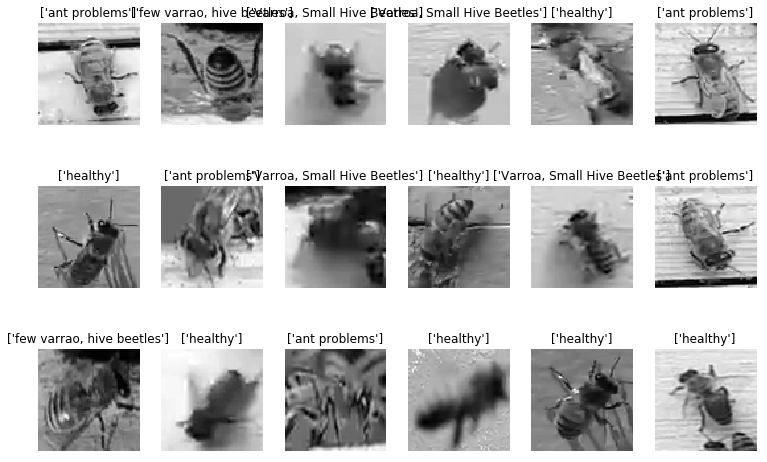

In [36]:
def plot_gallery(images, titles, h, w, n_row=3, n_col=6):
    """Helper function to plot a gallery of portraits"""
    plt.figure(figsize=(1.7 * n_col, 2.3 * n_row))
    plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.35)
    for i in range(n_row * n_col):
        plt.subplot(n_row, n_col, i + 1)
        plt.imshow(images[i].reshape((h, w)), cmap=plt.cm.gray)
        plt.title(titles[i], size=12)
        plt.xticks(())
        plt.yticks(())

plot_gallery(X, y, 78, 78) # defaults to showing a 3 by 6 subset of the faces

### Linear Dimensionality Reduction--Full PCA
We used full PCA to reduce the dimensions. Firstly we choose number of components equals to 300 and reduce the dimensions. Then we visualized the explained variance of each component and plan to choose the suitable component number.

In [37]:
# manipulated from Sebastian Raschka Example (your book!)
# also from hi blog here: http://sebastianraschka.com/Articles/2015_pca_in_3_steps.html
from sklearn.decomposition import PCA
def plot_explained_variance(pca):
    import plotly
    from plotly.graph_objs import Bar, Line
    from plotly.graph_objs import Scatter, Layout
    from plotly.graph_objs.scatter import Marker
    from plotly.graph_objs.layout import XAxis, YAxis
    plotly.offline.init_notebook_mode() # run at the start of every notebook
    
    explained_var = pca.explained_variance_ratio_
    cum_var_exp = np.cumsum(explained_var)
    
    plotly.offline.iplot({
        "data": [Bar(y=explained_var, name='individual explained variance'),
                 Scatter(y=cum_var_exp, name='cumulative explained variance')
            ],
        "layout": Layout(xaxis=XAxis(title='Principal components'), yaxis=YAxis(title='Explained variance ratio'))
    })
        

pca = PCA(n_components=320)
X_pca = pca.fit(X)
plot_explained_variance(pca)

we could find that 56 components yields us a cumulative explained variance ratio of around 90%. At 70 components, the cumulative explained variance is just above 91%. And after 70 components, the cumulative variance is rising but get slower. So we think that 70 components is a turning point.  
After experiment, we found that our images are too small to only extract top 70 components. So we still choose 300 as our components number, which cumulative explained variance is above 97%.

In [38]:
# lets do some PCA of the features and go from 1850 features to 20 features
from sklearn.decomposition import PCA

n_components = 300
print ("Extracting the top %d eigenvectors from %d images" % (
    n_components, X.shape[0]))

pca = PCA(n_components=n_components)
%time pca.fit(X.copy())
eigenfaces = pca.components_.reshape((n_components, 78, 78))

Extracting the top 300 eigenvectors from 5172 images
CPU times: user 11.5 s, sys: 785 ms, total: 12.3 s
Wall time: 3.49 s


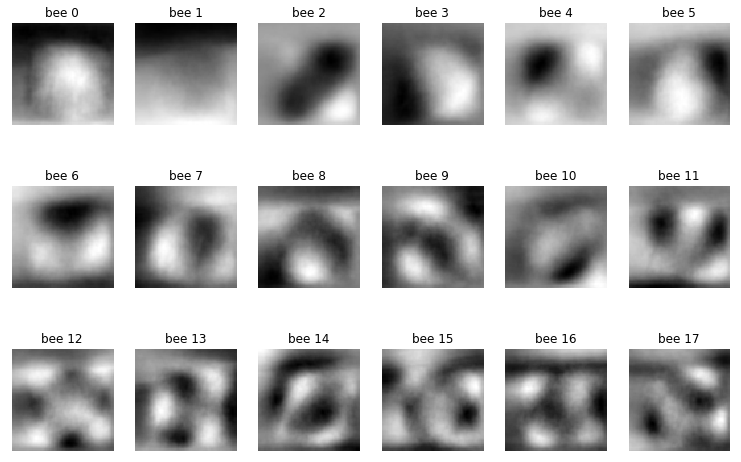

In [39]:
eigenface_titles = ["bee %d" % i for i in range(eigenfaces.shape[0])]
plot_gallery(eigenfaces, eigenface_titles, 78, 78)

We choose a picture which is processed after linear dimensionality reduction with Full PCA and reconstructe it. Then compared it with the original image to see if there are some different.

In [40]:
def reconstruct_image(trans_obj,org_features):
    low_rep = trans_obj.transform(org_features)
    rec_image = trans_obj.inverse_transform(low_rep)
    return low_rep, rec_image
    
idx_to_reconstruct = 4    
X_idx = X[idx_to_reconstruct]
low_dimensional_representation, reconstructed_image = reconstruct_image(pca,X_idx.reshape(1, -1))

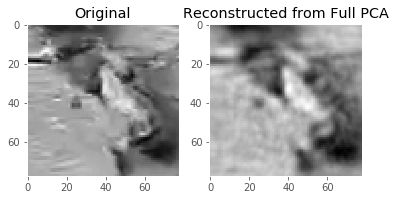

In [41]:
plt.subplot(1,2,1)
plt.imshow(X_idx.reshape((78, 78)), cmap=plt.cm.gray)
plt.title('Original')
plt.grid()
plt.subplot(1,2,2)
plt.imshow(reconstructed_image.reshape((78, 78)), cmap=plt.cm.gray)
plt.title('Reconstructed from Full PCA')
plt.grid()

### Linear Dimensionality Reduction--Randomize PCA  

We used another linear dimensionality reduction method--randomize PCA. Also, we choose 300 as our component number.

In [42]:
from sklearn.decomposition import PCA

n_components = 300
print ("Extracting the top %d eigenvectors from %d images" % (
    n_components, X.shape[0]))

rpca = PCA(n_components=n_components,svd_solver='randomized')
%time rpca.fit(X.copy())
eigenfaces = rpca.components_.reshape((n_components, 78, 78))

Extracting the top 300 eigenvectors from 5172 images
CPU times: user 11.2 s, sys: 1.1 s, total: 12.3 s
Wall time: 4.14 s


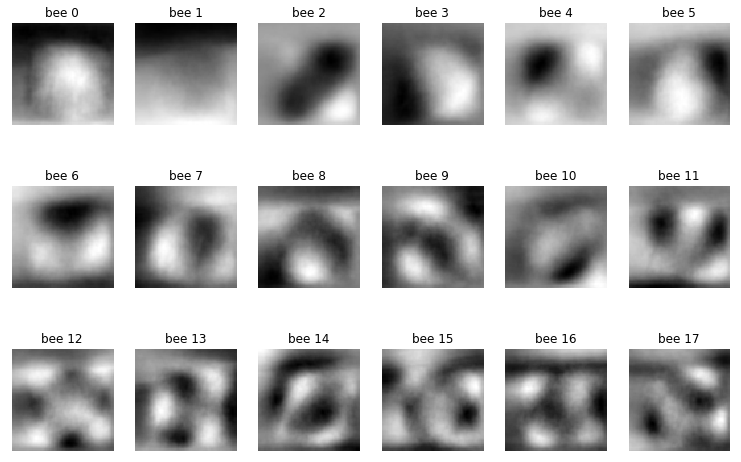

In [43]:
eigenface_titles = ["bee %d" % i for i in range(eigenfaces.shape[0])]
plot_gallery(eigenfaces, eigenface_titles, 78, 78)

We could compare the result with the original image.

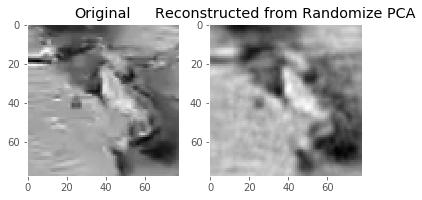

In [45]:
idx_to_reconstruct = 4    
X_idx = X[idx_to_reconstruct]
low_dimensional_representation, reconstructed_image = reconstruct_image(rpca,X_idx.reshape(1, -1))

plt.subplot(1,2,1)
plt.imshow(X_idx.reshape((78, 78)), cmap=plt.cm.gray)
plt.title('Original')
plt.grid()
plt.subplot(1,2,2)
plt.imshow(reconstructed_image.reshape((78, 78)), cmap=plt.cm.gray)
plt.title('Reconstructed from Randomize PCA')
plt.grid()

### Non-linear Dimensionality Reduction--kernel PCA

We use kernel PCA to reducting dimensionality. Component number is 300. Also we need to set parameter 'inverse transform' to True.

In [46]:
%%time
from sklearn.decomposition import KernelPCA

n_components = 300
print ("Extracting the top %d eigenvectors from %d images, not calculating inverse transform" % (n_components, X.shape[0]))

kpca = KernelPCA(n_components=n_components, kernel='rbf', 
                fit_inverse_transform=False, gamma=12, # very sensitive to the gamma parameter,
                remove_zero_eig=True)  
kpca.fit(X.copy())

Extracting the top 300 eigenvectors from 5172 images, not calculating inverse transform
CPU times: user 31.9 s, sys: 977 ms, total: 32.8 s
Wall time: 9.34 s


In [47]:
%%time
#  THIS  TAKES A LONG TIME TO RUN
from sklearn.decomposition import KernelPCA

n_components = 300
print ("Extracting the top %d eigenfaces from %d faces, ALSO getting inverse transform" % (n_components, X.shape[0]))

kpca = KernelPCA(n_components=n_components, kernel='rbf', 
                fit_inverse_transform=True, gamma=12, # very sensitive to the gamma parameter,
                remove_zero_eig=True)  
kpca.fit(X.copy())

Extracting the top 300 eigenfaces from 5172 faces, ALSO getting inverse transform
CPU times: user 42.1 s, sys: 1.41 s, total: 43.5 s
Wall time: 12.8 s


After doing all above, we virtualize some images' eigenvectors. 

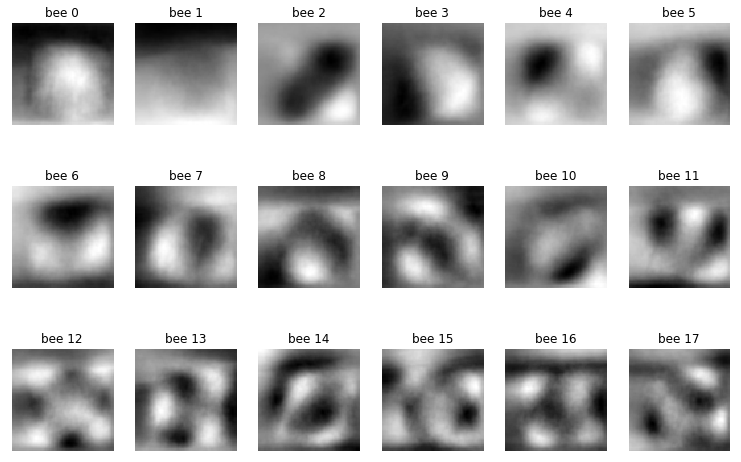

In [48]:
eigenface_titles = ["bee %d" % i for i in range(eigenfaces.shape[0])]
plot_gallery(eigenfaces, eigenface_titles, 78, 78)

The final part is draw original image along with image after kenel PCA to simply compare image.

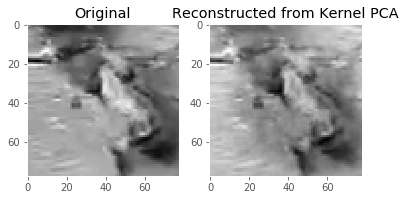

In [49]:
idx_to_reconstruct = 4    
X_idx = X[idx_to_reconstruct]
low_dimensional_representation, reconstructed_image = reconstruct_image(kpca,X_idx.reshape(1, -1))

plt.subplot(1,2,1)
plt.imshow(X_idx.reshape((78, 78)), cmap=plt.cm.gray)
plt.title('Original')
plt.grid()
plt.subplot(1,2,2)
plt.imshow(reconstructed_image.reshape((78, 78)), cmap=plt.cm.gray)
plt.title('Reconstructed from Kernel PCA')
plt.grid()

### Compare Linear and Non-linear  Reduction
Firstly, we just put the original image, full PCA, randomized PCA and kernel PCA together. Simply observe them.

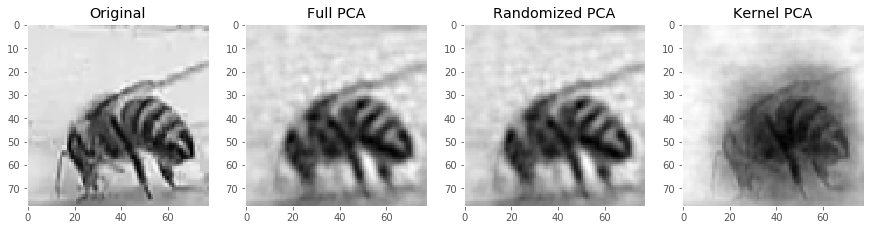

<function __main__.plt_reconstruct(idx_to_reconstruct)>

In [50]:
import warnings
# warnings.simplefilter('ignore', DeprecationWarning)
# warnings.simplefilter("always",DeprecationWarning)
from ipywidgets import widgets  # make this interactive!


def plt_reconstruct(idx_to_reconstruct):
    idx_to_reconstruct = np.round(idx_to_reconstruct)
    # idx_to_reconstruct = 10 
    reconstructed_image = pca.inverse_transform(pca.transform(X[idx_to_reconstruct].reshape(1, -1)))
    reconstructed_image_rpca = rpca.inverse_transform(rpca.transform(X[idx_to_reconstruct].reshape(1, -1)))
    reconstructed_image_kpca = kpca.inverse_transform(kpca.transform(X[idx_to_reconstruct].reshape(1, -1)))
    
    
    plt.figure(figsize=(15,7))
    
    plt.subplot(1,4,1)
    plt.imshow(X[idx_to_reconstruct].reshape((78, 78)), cmap=plt.cm.gray)
    plt.title('Original')
    plt.grid()
    
    plt.subplot(1,4,2)
    plt.imshow(reconstructed_image.reshape((78, 78)), cmap=plt.cm.gray)
    plt.title('Full PCA')
    plt.grid()
    
    plt.subplot(1,4,3)
    plt.imshow(reconstructed_image_rpca.reshape((78, 78)), cmap=plt.cm.gray)
    plt.title('Randomized PCA')
    plt.grid()
    
    plt.subplot(1,4,4)
    plt.imshow(reconstructed_image_kpca.reshape((78, 78)), cmap=plt.cm.gray)
    plt.title('Kernel PCA')
    plt.grid()
    
    
widgets.interact(plt_reconstruct,idx_to_reconstruct=(0,n_samples-1,1),__manual=True)

It is obvious that kernel PCA is better than randomized PCA. The worst result is full PCA. Then we use SSIM to measure similarity of image structure and make a more quantitative comparison.<br />
The Structural Similarity Index (SSIM) is a perceptual metric that quantifies image quality degradation caused by processing such as data compression or by losses in data transmission. The closer two images's SSIM value is to 1, the greater the similarity of the picture.<br />
We choose first 100 images to calculate SSIM because for now, our computers could only calculate hundreds images without break down. Also, we think 100 images are enough to represent the differences between linear dimensionality reduction and non-linear dimensionality reduction.

In [51]:
from skimage.measure import compare_ssim
import matplotlib.pyplot as plt
import numpy as np
import cv2

In [52]:
original2full = []
original2kpca = []

for index in range(0,100):
    reconstructed_image = pca.inverse_transform(pca.transform(X[index].reshape(1, -1)))
    reconstructed_image_rpca = rpca.inverse_transform(rpca.transform(X[index].reshape(1, -1)))
    reconstructed_image_kpca = kpca.inverse_transform(kpca.transform(X[index].reshape(1, -1)))

    original = X[index].reshape((78, 78))
    full_pca_img = reconstructed_image.reshape((78, 78))
    rpca_img = reconstructed_image_rpca.reshape((78, 78))
    kpca_img = reconstructed_image_kpca.reshape((78, 78))

    (score,diff) = compare_ssim(original, full_pca_img, full=True) # SSIM
    diff = (diff * 255).astype("uint8")
    # print("SSIM: {}".format(score))
    original2full.append(score)
    
    (score,diff) = compare_ssim(original, kpca_img, full=True) # SSIM
    # diff = (diff * 255).astype("uint8")
    # print("SSIM: {}".format(score))
    original2kpca.append(score)
print("success")

success


In [53]:
print("Full PCA compared Original image:",np.mean(original2full))
print("Kernel PCA compared Original image:",np.mean(original2kpca))

Full PCA compared Original image: 0.8922283278998623
Kernel PCA compared Original image: 0.7299047940439911


We calculate first 100 Full PCA images' SSIM value between original images, storing every SSIM value and calculate mean. Then do the same thing to Kernel PCA images and original images. The result shows that images processed after Full PCA is more same with the original images than Kernel PCA on average.  
But at the above part, we do see some pictures of Kernel PCA more clear than the Full PCA. Some are too blurry to figure out what it is. So we speculate that Kernel PCA is less stable than Full PCA. When it do well, it do pretty well. When it not working well, the dimensionality reduction result is bad.

## Feature Extraction--DAISY
The DAISY local image descriptor is based on gradient orientation histograms similar to the SIFT descriptor. It is formulated in a way that allows for fast dense extraction which is useful for like bag-of-features image representations. So, we use DAISY to perform feature extraction.

We randomly selected an image from the image gallery.

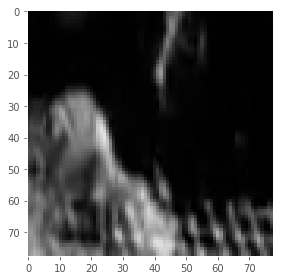

In [54]:
from skimage.io import imshow

idx_to_reconstruct = int(np.random.rand(1)*len(X))
img  = X[idx_to_reconstruct].reshape((78,78))
imshow(img)
plt.grid()

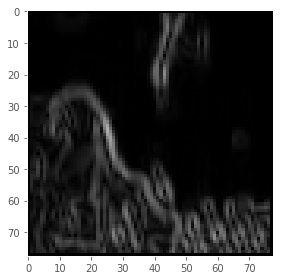

In [55]:
from skimage.filters import sobel_h, sobel_v

gradient_mag = np.sqrt(sobel_v(img)**2 + sobel_h(img)**2 ) 
imshow(gradient_mag)
plt.grid()

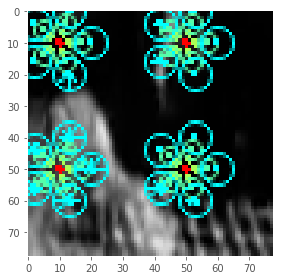

In [56]:
from skimage.feature import daisy

# lets first visualize what the daisy descripto looks like
features, img_desc = daisy(img,step=40, radius=10, rings=3, histograms=5, orientations=8, visualize=True)
imshow(img_desc)
plt.grid()

In [57]:
# now let's understand how to use it
features = daisy(img,step=10, radius=10, rings=2, histograms=4, orientations=8, visualize=False)
print(features.shape)
print(features.shape[0]*features.shape[1]*features.shape[2])

(6, 6, 72)
2592


In [58]:
# create a function to tak in the row of the matric and return a new feature
def apply_daisy(row,shape):
    feat = daisy(row.reshape(shape),step=10, radius=10, rings=2, histograms=6, orientations=8, visualize=False)
    return feat.reshape((-1))

%time test_feature = apply_daisy(X[3],(78,78))
test_feature.shape

CPU times: user 22.4 ms, sys: 2.96 ms, total: 25.4 ms
Wall time: 23.1 ms


(3744,)

In [59]:
0.028 * len(X)

144.816

In [60]:
%time daisy_features = np.apply_along_axis(apply_daisy, 1, X, (78,78))
print(daisy_features.shape)

CPU times: user 47 s, sys: 1.97 s, total: 48.9 s
Wall time: 49 s
(5172, 3744)


In [61]:
from sklearn.metrics.pairwise import pairwise_distances
# find the pairwise distance between all the different image features
%time dist_matrix = pairwise_distances(daisy_features)

CPU times: user 2.8 s, sys: 97.8 ms, total: 2.9 s
Wall time: 1.07 s


## Nearest Neighbor Classifier

First, we visualized the difference through built the pairwise distance of DAISY features to see the actual classification performance. We selected the fifth bee picture, its hive has ant problems, and then we find the closest picture to it, we found that the bee's hive found in the picture also suffered the same problem. It is further confirmed that the Daisy feature extraction method is very suitable for our prediction task.

original: ['ant problems']
cloest image: ['ant problems']


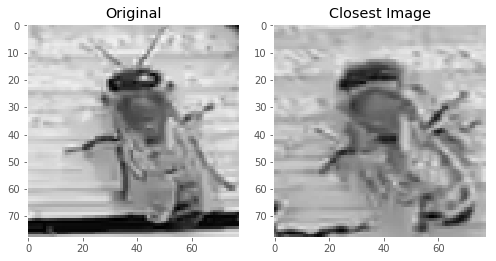

In [23]:
import copy
# find closest image to current image
idx1 = 5
distances = copy.deepcopy(dist_matrix[idx1,:])
distances[idx1] = np.infty # dont pick the same image!
idx2 = np.argmin(distances)

plt.figure(figsize=(7,10))
plt.subplot(1,2,1)
imshow(X[idx1].reshape((78,78)))
plt.title("Original")
plt.grid()

plt.subplot(1,2,2)
imshow(X[idx2].reshape((78,78)))
plt.title("Closest Image")
plt.grid()

print("original:", y[idx1])
print("cloest image:",y[idx2])

To prove the accuracy of our model again, we divide the data set into a training set to build the model, and a testing set to evaluate the performance of our model. This feature extraction method showed promise for our prediction tasks. We build the nearest neighbor classifier to calculate the accuracy, which nearly reached 70% to predict whether the hive is sick. This is a good prediction and also meets our accuracy requirements.

In [24]:
from sklearn import neighbors, datasets
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier

h = .12  # step size in the mesh



X = daisy_features
X_training, X_test = X[0:1300,:], X[1300:3744,:]
y_training, y_test = y[0:1300], y[1300:3744]


clf = neighbors.KNeighborsClassifier(7, weights='distance')
clf.fit(X_training, y_training)



Z = clf.predict(X_test)

accuracy = clf.score(X_test, y_test)
percentage = accuracy * 100
print('Accuracy : ' + str(round(accuracy * 100, 2)) + '%')

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:18: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


KeyboardInterrupt: 

## 4. Exceptional Work

### Detection of feature points
ORB uses FAST (features from accelerated segment test) algorithm to detect feature points. This definition is based on the image gray value around the feature point, and detects the pixel value around the candidate feature point. If there are enough pixel points in the field around the candidate point and the difference between the pixel value and the candidate point is big enough, the candidate point is considered to be a feature point.<br />
Where I (x) is the grayscale of any point on the circumference, I (p) is the grayscale of the center of the circle, and Ed is the difference threshold of the grayscale value.
Additional acceleration was used for faster results. If 4 points around the candidate point are tested at an Angle of 90 degrees, there should be at least 3 points with a sufficiently large difference in gray value from the candidate point; otherwise, no other points need to be calculated, and the candidate point is not a feature point directly. The radius of the circle around the candidate point is a very important parameter. Here, for the sake of simplicity and efficiency, the radius is 3, and a total of 16 peripheral pixels need to be compared. In order to improve the efficiency of comparison, only N peripheral pixels are usually used for comparison, which is often referred to as "fast-n". FAST-9 is recommended by many literatures. On the author's home page, there are FAST-9, FAST-10, FAST-11 and FAST-12.
### Compute the feature descriptor
After we get the feature points we need to describe the properties of these feature points in some way. The output of these attributes is described as the Feature Descritors for the Feature key point. The ORB use a BRIEF algorithm to calculate the description for a Feature key point.
The core idea of BRIEF algorithm is to select N point pairs around the key point P in a certain mode and combine the comparison results of these N point pairs as descriptors.
### Matching of feature points
The biggest characteristic of ORB algorithm is its fast computation speed. This is primarily due to the use of FAST to detect feature points, which is notoriously FAST as its name suggests. Once again, the BRIEF algorithm is used to calculate the descriptor. The representation of binary strings specific to the descriptor not only saves storage space, but also greatly shortens the matching time.

#### Pick up the standard picture
From all of the pictures we have, we use a random picure as our standard picture to extract features. Because if a specific image is selected, the matching results may be over-dependent and representative. However, each random selection of the image will make the matching results more universal, so we choose the random image as the standard image for each matching. At first, All the pictures have been grayscale processed. Here we do not need to carry out additional grayscale processing, we just need to refer to the part of the picture from the set of Data Preparation part. Furthremore, we resize all of data into 78x78 size that is easy to compare the difference from visual. But, the type of cv2.image read is uint8, the orignal picture is float. Therefore, we can use img_as_ubyte translate the image type from float into uint8 from skimage package. Then we get the standard picture's keypoints and descriptors.<br />
Because of the version of openCV (4.0.0) and Python, we cannot use drawKeypoints function to pick out the key point directly. So, I use draw_keypoints function in following code and use cv2.circle() function to pick ouy the picture key points and show them out.


In [62]:
def draw_keypoints(vis, keypoints, color = (255, 0, 0)):
    for kp in keypoints:
            x, y = kp.pt
            cv2.circle(vis, (int(x), int(y)), 1, color)

In [63]:
print (cv2.__version__)

4.0.0


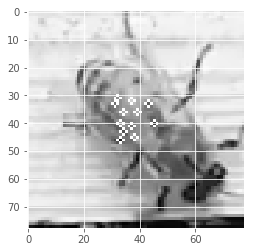

(<matplotlib.image.AxesImage at 0x1ccf704ef0>, None)

In [68]:
from skimage.io import imshow

from skimage import img_as_ubyte
import cv2
import numpy as np
from matplotlib import pyplot as plt
orb = cv2.ORB_create()
idx_to_reconstruct = int(np.random.rand(1)*len(X))
img0 = X[idx_to_reconstruct].reshape((78,78))
img3 = np.array(img0)
img1 = img_as_ubyte(img3)

kp1, des1 = orb.detectAndCompute(img1,None)

draw_keypoints(img1,kp1,color=(255,0,0))
plt.imshow(img1,cmap='Greys_r'),plt.show()

#### Compare standard picture and bee image
First, we create a BFmatch to violent match. And BFmatcher calculates the distance between one feature descriptor of the matched layer and all feature descriptors of the layer to be matched to return the closest distance. <br />
Then we get all of pictures from bee image set and compare with the random standard picture one by one that we selected before. <br /> 


#### Problem we meet in this process
In this process, we find some of the pictures cannot use orb extract feature approach. We assume that is because of the small size of pixels. So we try to catch the error and tell the user without pictures match. Furthurmore, the picture pixels are small, so some of picture cannot get any feature match from each other. So there is 0 features match in this process. And the rest of the images can be used for feature matching. <br />In addition, we tried to find the most matching picture, but after processing, we found that the matching point of the standard picture was the same as that of all the pictures, so we showed all the pictures that could be matched. After screening with feature distance greater than 80%, we found that there was no image match, so we believed that the image we selected was too small.

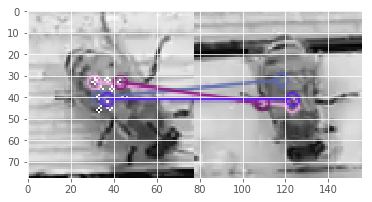

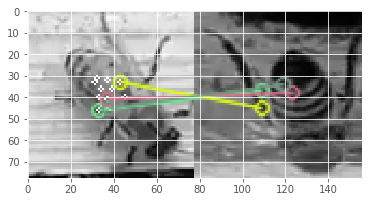

Without pictures match


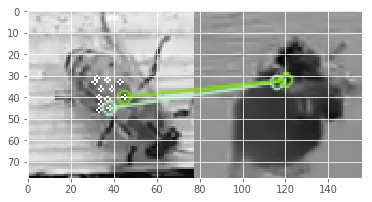

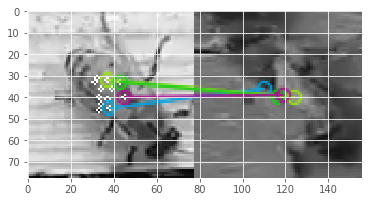

In [69]:
X_kp2 = []
X_des2 = []

bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True) 

for j in range(5):
    img_t = im_grayarr[j]
    img2 = img_as_ubyte(img_t)   
    kp2, des2 = orb.detectAndCompute(img2,None)
    X_kp2.append(kp2) 
    X_des2.append(des2) 
    try:
        matches = bf.match(des1, X_des2[j]) 
        #good = [m for (m,n) in matches if m.distance < 0.75*n.distance]
    except:
        print ('Without pictures match')
        continue
    else:
        if len(matches) == 0:
            print ('0 features match')
        else:        
            matches = sorted(matches, key = lambda x:x.distance)
            img3 = cv2.drawMatches(img1,kp1,img2,X_kp2[j],matches,img2, flags=2)
            plt.imshow(img3),plt.show()
